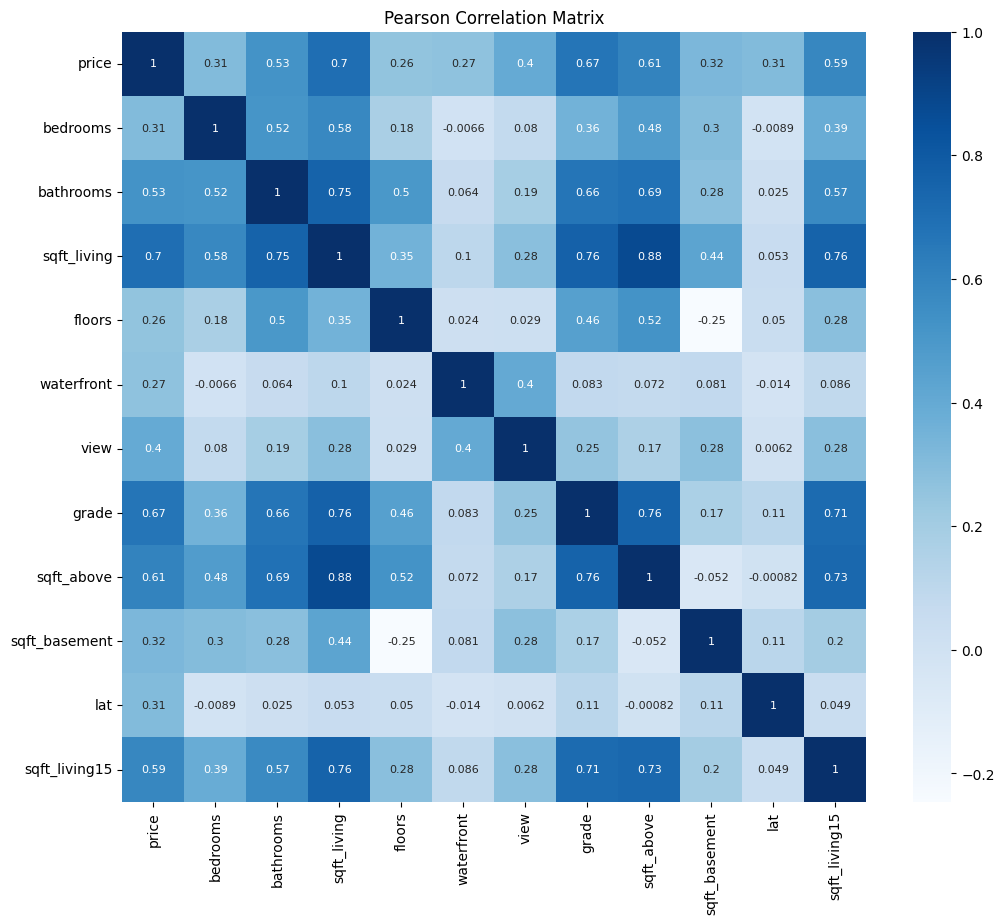

/tmp/ipykernel_23688/2719267714.py:68: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0       -0.866697
1       -0.005688
2       -0.980827
3        0.174086
4       -0.081956
           ...   
21608   -0.490533
21609   -0.381579
21610   -0.375856
21611   -0.381579
21612   -0.585868
Name: price, Length: 21613, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:, 1:] = (df - df.mean()) / df.std()
/tmp/ipykernel_23688/2719267714.py:68: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0       -1.447430
1        0.175603
2       -1.447430
3        1.149422
4       -0.149004
           ...   
21608    0.500209
21609    0.500209
21610   -1.772037
21611    0.500209
21612   -1.772037
Name: bathrooms, Length: 21613, dtype: float64' has dtype incompatible with int64, please explicitly cast to a c

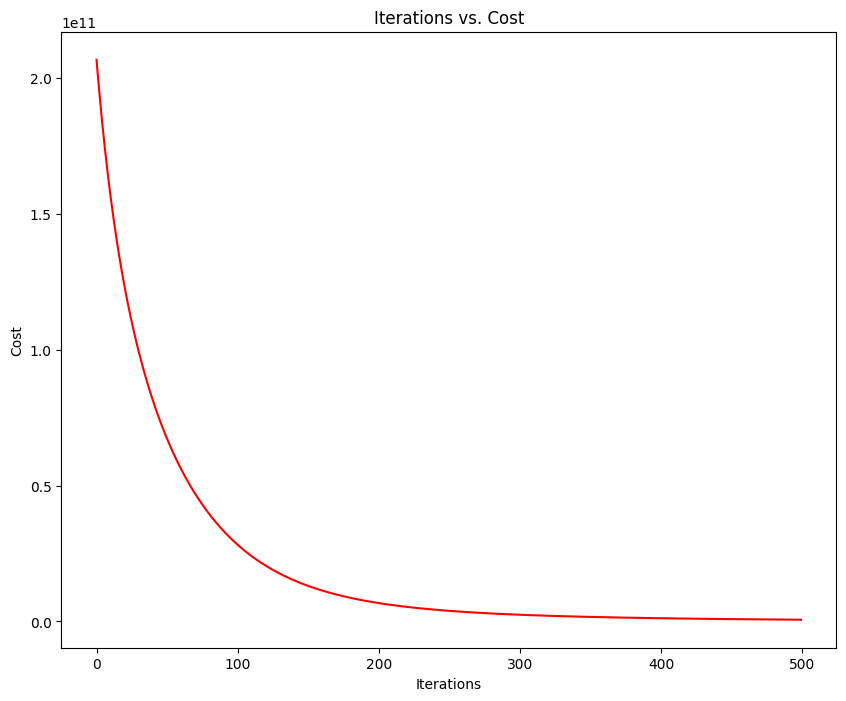

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Read the house data into a data frame
df = pd.read_csv("../data/kc_house_data.csv")

# Display first five observations
df.head()

# Describe the dataset
df.describe().round(2)

# Drop the id and date columns
df = df.drop(['id', 'date'], axis=1)

# Display number of data observations
# print("We have:", len(df), "observations.")

# Display the number of starting features
# print("We have this many columns:", len(df.columns))

# Check the types of data
# print("Data types:\n", df.dtypes)

# Specify target and features
target = df.iloc[:, 0].name
features = df.iloc[:, 1:].columns.tolist()

features

correlations = df.corr()
correlations['price']

correlation_target = abs(correlations['price'])

# Display features with correlation < 0.2
removed_features = correlation_target[correlation_target < 0.2]

# Remove features with correlation < 0.2
removed_feature_list = removed_features.keys().tolist()
df = df.drop(removed_feature_list, axis=1)

# Plot Pearson correlation matrix
fig_1 = plt.figure(figsize=(12, 10))
new_correlations = df.corr()
sns.heatmap(new_correlations, annot=True, cmap='Blues', annot_kws={'size': 8})
plt.title('Pearson Correlation Matrix')
plt.show()

# Determine the highest inter correlations
highly_correlated_feats = new_correlations[new_correlations > 0.75]
highly_correlated_feats.fillna('-')

# Remove features which are highly correlated
df = df.drop(['sqft_above', 'sqft_living15'], axis=1)

features = df.iloc[:, 1:].columns.tolist()
len_of_features = len(features)

len_of_features

# Time for Multivariate Linear Regression!

df.iloc[:, 1:] = (df - df.mean()) / df.std()

# Create X, y and theta
X = df.iloc[:, 1:]
ones = np.ones([len(df), 1])

X = np.concatenate((ones, X), axis=1)
y = df.iloc[:, 0:1].values
theta = np.zeros([1, len_of_features + 1])

# Store target
target = y

# Display the size of the matrices
X.shape, y.shape, theta.shape

# Define compute cost function
def compute_cost(X, y, theta):
    H = X @ theta.T
    J = np.power((H - y), 2)

    sum = np.sum(J)/(2 * len(X))

    return sum

# set iterations and alpha (learning rate)
alpha = 0.01
iterations = 500

# Define gradient descent function
def gradient_descent(X, y, theta, iterations, alpha):
    cost = np.zeros(iterations)

    for i in range(iterations):
        H = X @ theta.T
        theta = theta - (alpha / len(X)) * np.sum(X * (H - y), axis=0)

        cost[i] = compute_cost(X, y, theta)
    
    return theta, cost


# Do Gradient Descent and display final theta
final_theta, cost = gradient_descent(X, y, theta, iterations, alpha)
final_theta.round(2)

# Compute and display final cost
final_cost = compute_cost(X, y, final_theta)
final_cost.round(2)

# Plot Iterations vs. Cost figure
fig_2, ax = plt.subplots(figsize=(10, 8))
ax.plot(np.arange(iterations), cost, 'r')

# Labels and Title
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
ax.set_title("Iterations vs. Cost")

# Show Plot
plt.show()